# Setup: OpenCV

For this assignment you will need to use a popular and powerful library known as [OpenCV](https://opencv.org/). To do this on hub, you will need to open a terminal (File->New Launcher->Terminal) and enter `pip install opencv-python`. If you are trying to run the notebook somewhere else and can't figure out how to install the library, ask on piazza and provide details.

# Assignment: Solving Image Maze 

Given a maze as an image with a start and end point, we would like to write code to solve the maze. 

An image is a 2D matrix of pixels of a particular size that depends on its resolution. Each 
pixel has a color which is given by its Red, Green and Blue (RGB) values.
 
Given an image, we will view it as a graph where each pixel of the image is a vertex 
and edges connect a pixel to its neighbor. The weight of an edge should be very small if
the pixel colors are similar (i.e, the differences between r, g and b values are close to zero)
and correspondingly large as the pixel colors diverge.
  
Next, given a source pixel $(i_0, j_0)$ and destination pixel, 
$(i_1, j_1)$, we wish find the shortest weight path from source to destination.

You should use the Dijkstra's algorithm modified in two ways:
   - It can exit as soon as the destination is reached.
   - A 1000 x 1000 pixel image gives rise to a graph with million vertices. Storing such a graph as an adjacency list is going to be very memory intensive. Instead, your goal will be to generate the vertices and edges *on-the-fly*.
   
We will use opencv library, a popular computer vision library to load, and manipulate images of mazes.



## Manipulating Images

You can directly manipulate images in python in many ways. The `opencv` library is considered a standard for numerous
image manipulation tasks.

Here we load an image `maze.png` and you can see it nicely plotted with coordinates. We then show you two pixels
shown in red and blue. The goal here is to detect a path from one of the colored circle to the other, in the maze without crossing
the black pixels.

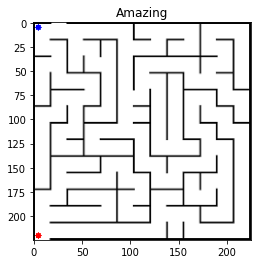

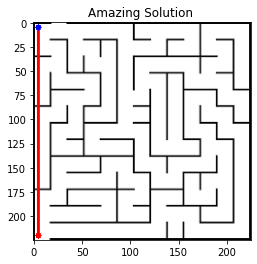

In [138]:
from matplotlib import pyplot as plt
import cv2
# You can read png, jpg and other file types 
img = cv2.imread('maze.png') # read an image from a file using opencv (cv2) library
# you can annotate images 
cv2.circle(img,(5,220), 3, (255,0,0), -1) # add a circle centered at (5, 220) radius 3, color red (RGB: 255,0,0)
cv2.circle(img, (5,5), 3, (0,0,255), -1) # add a circle centered at (5,5) radius 3, color red (RGB: 0,0,255)
plt.imshow(img) # show the image on the screen 
plt.title('Amazing')
plt.show()

img = cv2.imread('maze-solution.png') # read an image from a file using opencv (cv2) library
# you can annotate images 
cv2.circle(img,(5,220), 3, (255,0,0), -1) # add a circle centered at (5, 220) radius 3, color red (RGB: 255,0,0)
cv2.circle(img, (5,5), 3, (0,0,255), -1) # add a circle centered at (5,5) radius 3, color red (RGB: 0,0,255)
plt.imshow(img) # show the image on the screen 
plt.title('Amazing Solution ')
plt.show()


Given an image it is simple to read the color at a pixel. Let us read the color at pixel (645, 67)

In [139]:
print('Image size (height, width, num layers) is', img.shape)
px = img[145, 67] # img[y,x] is the color of the pixel of x,y
print(px)

cv2.circle(img, (80, 18), 3, (198,31,4),-1) # Draw a colored circle centered at (80, 18)
px1 = img[18, 80] # It is important to note that rows of the image are y values and columns are x values.
print(px1)

px2 = img[80, 18] # This is important to note that indexing the img data structure takes y, x values.
# Most opencv functions will require (x,y) coordinates for pixel as is natural.
print(px2)

Image size (height, width, num layers) is (225, 225, 3)
[255 255 255]
[198  31   4]
[0 0 0]


The pixel color is expressed in RGB format. R is the red value from 0 -> 255, G is the green value 0 -> 255 and B is the blue value from 0 -> 255 

We will now define a edge weight function for an edge in the image

In [214]:
import math 
def fixPixelValues(px):
    # convert the RGB values into floating point to avoid an overflow that will give me wrong answers
    return [ float(px[0]), float(px[1]), float(px[2]) ]

## Given (x,y) coordinates of two neighboring pixels, calculate the edge weight.
# We take the squared euclidean distance between the pixel values and add 0.1
def getEdgeWeight(img, u, v):
    # get edge weight for edge between u, v
    # First make sure that the edge is legit
    i0,j0 = u.x, u.y
    i1,j1 = v.x, v.y
    height, width, _ = img.shape
    assert i0 >= 0 and j0 >= 0 and i0 < width and j0 < height # pixel position valid?
    assert i1 >= 0 and j1 >= 0 and i1 < width and j1 < height # pixel position valid?
    assert -1 <= i0 - i1 <= 1 # edge between node and neighbor?
    assert -1 <= j0 - j1 <= 1
    px1 = fixPixelValues(img[j0,i0])
    px2 = fixPixelValues(img[j1,i1])
    return 0.1 + (px1[0] - px2[0])**2 + (px1[1] - px2[1])**2 + (px1[2]- px2[2])**2
    
# This is a useful function that given a list of (x,y) values, 
# draw a series of red lines between each coordinate and next to 
# show the path in the image
def drawPath(img, path, pThick=2):
    v = path[0]
    x0, y0 = v[0], v[1]
    for v in path:
        x, y = v[0], v[1]
        cv2.line(img,(x,y), (x0,y0), (255,0,0),pThick)
        x0, y0 = x,y
        

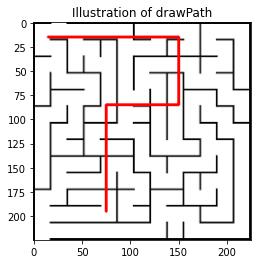

In [215]:
# Example
img = cv2.imread('maze.png') # read an image from a file using opencv (cv2) library
drawPath(img, [ (15, 15), (150, 15), (150, 85), (75, 85), (75, 195)])
plt.imshow(img) # show the image on the screen 
plt.title('Illustration of drawPath')
plt.show()

## Step 1: Compute Single Source Shortest Path For an Image

Given an image, compute the  shortest path between source and destination pixels by modifying Dijkstra's algorithm. __Your challenge  is to implement it without needing to create the entire the adjacency list for the graph
in the first place. However, for simplicity you can try a first cut implementation of a generic Dijkstra algorithm over
graphs represented as adjacency matrix or list.__ 

In [216]:
import numpy as np 

In [254]:
a = np.array([[9999999999, None, 23]*5]*2)

print(a)
print(a[0][1])
print(a[1, 2])
print(a.shape)

b = np.empty((1, 4), dtype=int)
print(b)

print(b.shape)

[[9999999999 None 23 9999999999 None 23 9999999999 None 23 9999999999
  None 23 9999999999 None 23]
 [9999999999 None 23 9999999999 None 23 9999999999 None 23 9999999999
  None 23 9999999999 None 23]]
None
23
(2, 15)
[[4619792497756654800 4637747561341046172 4628103046444036916
  4638451248782822812]]
(1, 4)


In [255]:
class Vertex: # This is the outline for a vertex data structure
    def __init__ (self,  i, j):
        self.x = i # The x coordinate
        self.y = j  # The y coordinate
        self.d = float('inf') # the shortest path estimate
        self.visited = False # Has this vertex's final shortest path distance been computed
        self.idx_in_priority_queue = -1 # The index of this vertex in the queue
        self.pi = None # the parent vertex.
    
        
# Dijkstra's algorithm requires a priority queue so that the 
# minimum weight vertex can be found efficiently.
# However, we provide you with a list data structure as a stand in for priority queue

class SimpleQueue: 
    # CONSTRUCTOR
    def __init__(self): 
        self.q = []
        
    # Insert a vertex into the queue
    def insert(self, v):
        v.idx_in_priority_queue = len(self.q)
        self.q.append(v)
        
    # Find the vertex with the smallest distance estimate, and 
    # delete it from the queue
    # return the vertex
    def get_and_delete_min(self):
        n = len(self.q)
        assert n > 0
        min_pos = 0
        for i in range(n):
            if self.q[i].d < self.q[min_pos].d:
                min_pos = i
        v = self.q[min_pos]
        del self.q[min_pos]
        return v
    
    # Is the queue empty?
    def is_empty(self):
        return len(self.q) == 0
    
    # Notify the queue that the weight of vertex v has been updated.
    def update_vertex_weight(self, v):
        pass # Nothing to do, for a simple list, we ignore this notification.
    


In [256]:
# However, if you want Dijkstra efficiently, 
# you may want to implement a priority queue.
# We provide you the signature for a priority queue.
# Feel free to implement extra functions if you wish
'''

class PriorityQueue:
    # Constructor: 
    def __init__(self):
        pass # YOUR CODE HERE
    
    def insert(self, v):
        pass # YOUR CODE HERE
    
    def get_and_delete_min(self):
        pass # YOUR CODE HERE: must return a vertex
    def is_empty(self):
        pass # YOUR CODE HERE: must return true/false
        
    def update_vertex_weight(self, v):
        pass # YOUR CODE HERE
        
    '''

'\n\nclass PriorityQueue:\n    # Constructor: \n    def __init__(self):\n        pass # YOUR CODE HERE\n    \n    def insert(self, v):\n        pass # YOUR CODE HERE\n    \n    def get_and_delete_min(self):\n        pass # YOUR CODE HERE: must return a vertex\n    def is_empty(self):\n        pass # YOUR CODE HERE: must return true/false\n        \n    def update_vertex_weight(self, v):\n        pass # YOUR CODE HERE\n        \n    '

In [257]:
from queue import PriorityQueue

In [258]:
def createVertices(img) :
    # get image width and height
    dimensions  = img.shape
    height = dimensions[0]
    width = dimensions[1]
    vertex_table = np.empty((height, width), dtype=Vertex)

    for j in range(height) :
        for i in range(width) :
            vertex_table[j, i] = Vertex(i, j)

    return vertex_table
            

In [259]:
def relax(img, u, v) :
    w = getEdgeWeight(img, u, v)

    # if the current distance estimate is bigger
    # than the distance to u and then we update it
    # with the new smaller distance through u
    if v.d > u.d + w :
        v.d = u.d + w
        v.pi = u
        return True # relax successful
    else :
        return False # we weren't able to relax

In [260]:
def makeVertexPQ(vertex_table):
    q = PriorityQueue()
    
    for j in range(vertex_table.shape[0]) : # y - rows
        for i in range(vertex_table.shape[1]) : # x - columns
            d = vertex_table[j, i].d
            q.put((d, id(vertex_table[j, i]), vertex_table[j, i]))

    print(q)

    return q

In [279]:
def getPath(vertex_table, source, dest) :
    curr_pos = dest
    path = []
    count = 0

    while curr_pos != source and count < vertex_table.shape[0]*vertex_table.shape[1]:
        path.append(curr_pos)
        parent = vertex_table[curr_pos[1], curr_pos[0]] # have to swap it for referencing the node
        assert(parent is not None)
        curr_pos = (parent.x, parent.y)
        count += 1

    path.append(source)

    return path

In [280]:
def computeShortestPath(img, source, dest): 
    # make table of vertices aka pixels
    vertex_table = createVertices(img)
    x, y = source[0], source[1]
    vertex_table[y, x].d = 0
    dummy = 0

    q = makeVertexPQ(vertex_table)

    while q.empty() != True :
        u = q.get()[2]

        #for nodes adjacent to u :
        for i in range(u.x-1, u.x+2) :
            for j in range(u.y-1, u.y+2) :
                if i >= 0 and j >= 0 and i < img.shape[1] and j < img.shape[0] :
                    relax(img, u, vertex_table[j, i])

        u.visited = True

    path = getPath(vertex_table, source, dest)

    return path

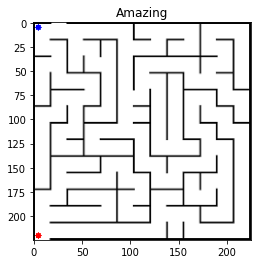

In [281]:
img = cv2.imread('maze.png') # read an image from a file using opencv (cv2) library
# you can annotate images 
cv2.circle(img,(5,220), 3, (255,0,0), -1) # add a circle centered at (5, 220) radius 3, color red (RGB: 255,0,0)
cv2.circle(img, (5,5), 3, (0,0,255), -1) # add a circle centered at (5,5) radius 3, color red (RGB: 0,0,255)
plt.imshow(img) # show the image on the screen 
plt.title('Amazing')
plt.show()

In [282]:
img = cv2.imread('maze.png') # read an image from a file using opencv (cv2) library
p = computeShortestPath(img, (5,220), (5,5))

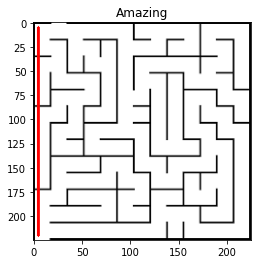

True

In [283]:
drawPath(img, p, 2)
plt.imshow(img) # show the image on the screen 
plt.title('Amazing')
plt.show()
cv2.imwrite('maze-solution.png', img)

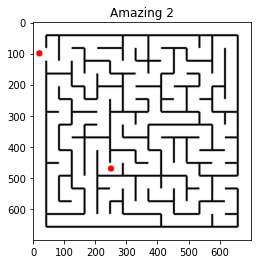

In [284]:
img = cv2.imread('maze2.JPG') # read an image from a file using opencv (cv2) library
cv2.circle(img,(250,470), 10, (255,0,0), -1) # add a circle centered at (600, 70) radius 10, color red (RGB: 255,0,0)
cv2.circle(img, (20,100), 10, (255,0,0), -1) # add a circle centered at (790,200) radius 10, color red (RGB: 255,0,0)
plt.imshow(img) # show the image on the screen 
plt.title('Amazing 2')
plt.show()

In [285]:
img = cv2.imread('maze2.JPG') # read an image from a file using opencv (cv2) library
p = computeShortestPath(img, (250,470), (20,100))

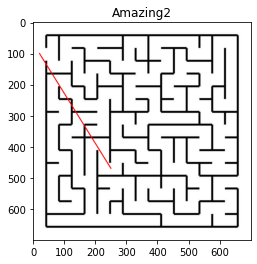

In [286]:
drawPath(img,p)
plt.imshow(img) # show the image on the screen 
plt.title('Amazing2')
plt.show()

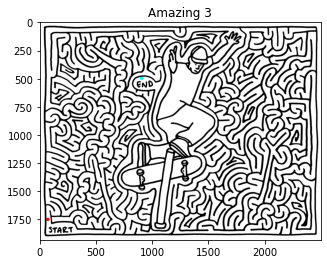

In [287]:
img = cv2.imread('maze3.JPG')
cv2.circle(img,(70,1750), 15, (255,0,0), -1) # add a circle centered at (600, 70) radius 10, color red (RGB: 255,0,0)
cv2.circle(img, (900,500), 15, (0,255,255), -1) # add a circle centered at (790,200) radius 10, color red (RGB: 255,0,0)
plt.imshow(img) # show the image on the screen 
plt.title('Amazing 3')
plt.show()

In [288]:
img = cv2.imread('maze3.JPG') # read an image from a file using opencv (cv2) library
p = computeShortestPath(img, (70,1750), (900,500))

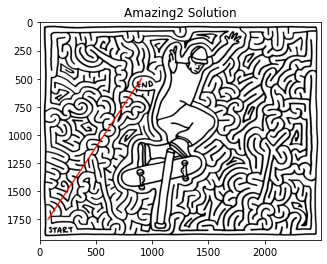

In [289]:
drawPath(img,p,10)
plt.imshow(img) # show the image on the screen 
plt.title('Amazing2 Solution')
plt.show()